In [1]:
import os #cmd line library
#\\ is a windows thing, on linux paths are /
data_folder = "C:\Users\story645\Desktop\gcdrb_sessions\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-1-59e3b40fb889>, line 3)

In [2]:
import os #cmd line library
#fix unicode escape error by replacing \ with \\ 
#is a windows thing, on linux paths are /
data_folder = "C:\\Users\\story645\\Desktop\\gcdrb_sessions\\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

C:\Users\story645\Desktop\gcdrb_sessions\data
C:\Users\story645\Desktop\gcdrb_sessions\data\nyc_2005_2015.csv


In [3]:
import pandas as pd
weather = pd.read_csv(data_path)

In [4]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [5]:
print(weather['TSNW'].max())
print(weather['TSNW'].mean())

1023
-1833.0578461538462


In [6]:
weather['TSNW'].describe()

count    1625.000000
mean    -1833.057846
std      3928.840691
min     -9999.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1023.000000
Name: TSNW, dtype: float64

In [7]:
import numpy as np

In [8]:
1>2

False

In [9]:
b = np.array(([[1,2,3],[4,5,6],[7,8,9]]))
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [10]:
b>2 #boolean mask

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [11]:
b[b>2] # [ means subsetting->get out little piece of whole]

array([3, 4, 5, 6, 7, 8, 9])

In [12]:
b[b<4]

array([1, 2, 3])

In [13]:
b[b==2]

array([2])

In [14]:
weather=-9999.0

In [15]:
weather[weather==-9999.0]

TypeError: 'float' object is not subscriptable

In [16]:
weather = pd.read_csv(data_path)

In [17]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [18]:
import numpy as np
print(np.nan)

nan


In [19]:
weather[weather==-9999.00]= np.nan

In [20]:
weather['TSNW'].tail()

1620   NaN
1621   NaN
1622   NaN
1623   NaN
1624   NaN
Name: TSNW, dtype: float64

In [21]:
weather_2 = weather.copy()

In [22]:
weather_2['TSNW'][weather_2['TSNW']==0] = 'NO SNOW'

C:\Users\story645\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
weather_2['TSNW'][2:10:2]

2    NO SNOW
4    NO SNOW
6        127
8        427
Name: TSNW, dtype: object

In [24]:
weather['TSNW'].describe()

count    1320.000000
mean       53.769697
std       151.237483
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1023.000000
Name: TSNW, dtype: float64

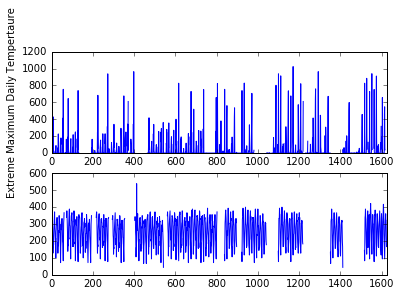

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2,1,1) #location of picture on grid
weather['TSNW'].plot(ax=ax)
ax.set_ylabel("Total Snowfall (inchs)")
ax2 = fig.add_subplot(2,1,2) #location of picture on grid
weather['EMXT'].plot(ax=ax2)
ax.set_ylabel("Extreme Maximum Daily Tempertaure")

In [26]:
weather[['TSNW', 'EMXT']].head()

,TSNW,EMXT
0,0,350
1,0,333
2,0,356
3,0,322
4,0,244


In [27]:
weather['TSNW', 'EMXT'].head()

KeyError: ('TSNW', 'EMXT')

In [28]:
weather[['TSNW', 'EMXT']].head()

,TSNW,EMXT
0,0,350
1,0,333
2,0,356
3,0,322
4,0,244


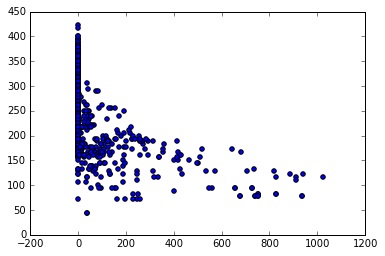

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(weather['TSNW'],weather['EMXT'])

In [31]:
weather['DATE'].head(3)

0    20050601
1    20050701
2    20050801
Name: DATE, dtype: int64

In [33]:


#use Python datetime strptime
from datetime import datetime 
"""the apply method applies the function 
that's passed inas an argument to every 
element in the column it's applied to
"""
def ds2dt(x):
    return datetime.strptime(str(x),'%Y%m%d')

parsed_date = weather['DATE'].apply(ds2dt)

In [35]:
print(parsed_date[:5])

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: DATE, dtype: datetime64[ns]


In [37]:
weather['DATE']=parsed_date

In [39]:
weather['DATE']

0      2005-06-01
1      2005-07-01
2      2005-08-01
3      2005-09-01
4      2005-10-01
5      2005-11-01
6      2005-12-01
7      2006-01-01
8      2006-02-01
9      2006-03-01
10     2006-04-01
11     2006-05-01
12     2006-06-01
13     2006-07-01
14     2006-08-01
15     2006-09-01
16     2006-10-01
17     2006-11-01
18     2006-12-01
19     2007-01-01
20     2007-02-01
21     2007-03-01
22     2007-04-01
23     2007-05-01
24     2007-06-01
25     2007-07-01
26     2007-08-01
27     2007-09-01
28     2007-10-01
29     2007-11-01
          ...    
1595   2012-11-01
1596   2012-12-01
1597   2013-01-01
1598   2013-02-01
1599   2013-05-01
1600   2013-07-01
1601   2013-08-01
1602   2014-02-01
1603   2010-01-01
1604   2010-02-01
1605   2010-03-01
1606   2010-04-01
1607   2010-05-01
1608   2010-06-01
1609   2010-07-01
1610   2010-08-01
1611   2010-09-01
1612   2010-10-01
1613   2010-11-01
1614   2010-12-01
1615   2011-01-01
1616   2011-02-01
1617   2011-03-01
1618   2011-05-01
1619   201

In [40]:
weather['MONTH'] = weather['DATE'].map(lambda x: x.month)

In [54]:
weather_pivot = weather.pivot_table(index='MONTH', 
            columns='STATION_NAME', 
            aggfunc={'EMNT':'mean', 'EMXT':'mean'})

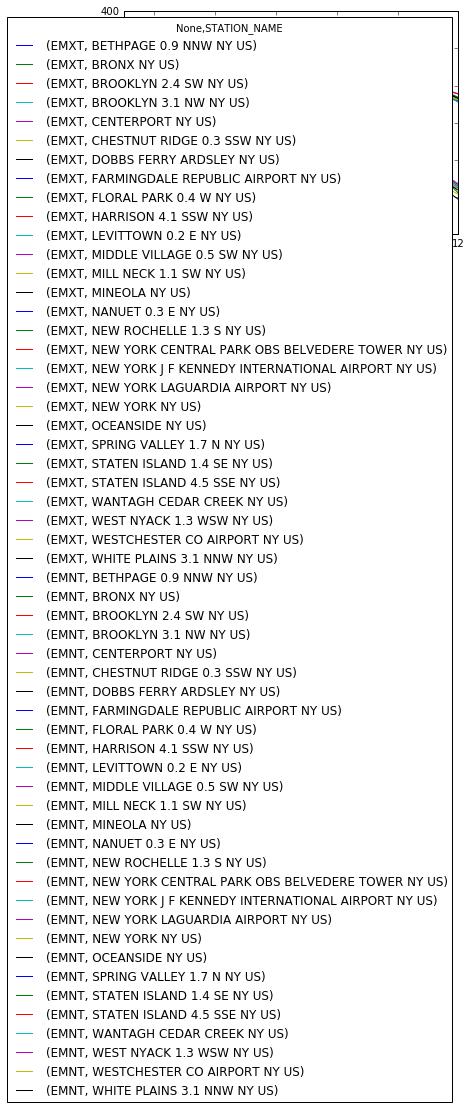

In [55]:
weather_pivot.plot()

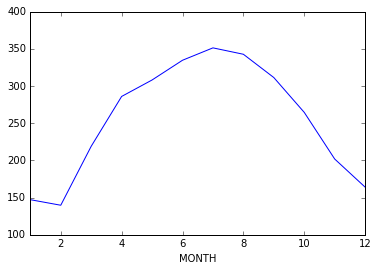

In [59]:
fig = plt.figy
weather_pivot['EMXT'].mean(axis=1).plot(ax=ax)
weather_pivot['EMNT'].mean(axis=1).plot(ax=ax)